# Credit Card Clustering 
The aim of this analysis is to develop a customer segmentation to help define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active card users during the last 6 months. 
The file is at a customer level with 18 behavioural variables 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

### Load Dataset 

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


As we can see from above that there are many outliers in the dataset. But we can't simply drop these outliers as they may contain useful information. So we wil treat them as extreme values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

### Data Preprocessing 

In [7]:
# Drop The Customer ID column because it does not influence the data 
df.drop('CUST_ID', axis=1, inplace= True)

In [8]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
#Lets check for misssing values 
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Lets treat them by filling the null values with the mean 
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace= True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace =True)

In [11]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df.columns 

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

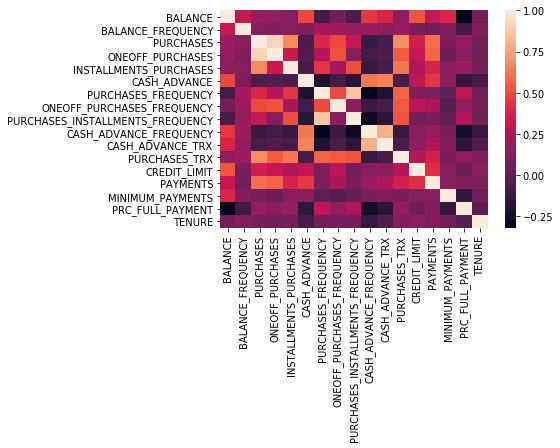

In [13]:
# Correlation plot 
sns.heatmap(df.corr())

In [14]:
#Applying Feature Scaling through StandardScaler 
from sklearn.preprocessing import StandardScaler 

In [15]:
scale = StandardScaler()
X = scale.fit_transform(df)

In [16]:
X.shape

(8950, 17)

### Modelling 

Clustering will be done using the KMeans algorithm 

In [17]:
from sklearn.cluster import KMeans 

In [19]:
n_clusters = 30
sse = []
for i in range(1,n_clusters):
    clusters = KMeans(i)
    clusters.fit(X)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    sse.append(clusters.inertia_)

In [20]:
print(labels)

[ 1 27 20 ... 19 11 11]


In [21]:
print(sse)

[152150.00000000003, 127784.87449145077, 111986.56831049248, 99073.93826774822, 91502.92043249558, 84850.98165827329, 79576.98520422637, 74809.22024398023, 69954.67524529326, 66470.07731911239, 63632.60568373959, 61365.754494156754, 59149.264199031015, 57499.08782537411, 56173.75714741051, 54267.99563431594, 53029.703949222036, 51784.32939099486, 50648.12877591278, 49826.04537574874, 48363.46834764414, 47482.28632798122, 47099.360553454695, 45943.98905954413, 45276.61077325216, 44309.05220957185, 43802.17308653998, 42871.17644274824, 42379.57157839411]


In [22]:
print(centroids)

[[ 7.42484912e-02  2.42373067e-01 -1.67105571e-01 -6.06769000e-02
  -2.82883330e-01 -2.88904998e-01 -4.82971168e-01 -1.66775447e-01
  -5.29133159e-01 -4.67918136e-01 -3.77555309e-01 -3.66209693e-01
   1.17107549e+00 -9.95315654e-02 -1.14789378e-01 -3.77431668e-01
   2.65248742e-01]
 [-1.79541090e-01  4.53415367e-01 -3.81462841e-01 -2.67880225e-01
  -4.09778728e-01 -2.95901563e-01 -8.92406290e-01 -4.39105968e-01
  -7.66957741e-01 -2.49292844e-01 -2.74849943e-01 -5.00454375e-01
  -6.26151629e-01 -3.64599172e-01 -1.10698119e-01 -4.73229781e-01
   2.81707262e-01]
 [ 9.66082827e-01  4.62349581e-01  1.74506599e-01  5.59857971e-02
   3.09205725e-01  8.81321423e-01  1.00516154e+00  3.78863755e-01
   9.96863668e-01  1.41488529e+00  1.18964392e+00  5.35412376e-01
   4.83704312e-01  3.42197570e-01  2.46262173e-01 -4.21009310e-01
   1.97645104e-01]
 [ 1.88271549e-01  4.68146530e-01  8.17115708e-01  7.99494662e-01
   4.62776155e-01 -3.40370983e-01  1.16236133e+00  1.74232305e+00
   1.06817041e+00 -

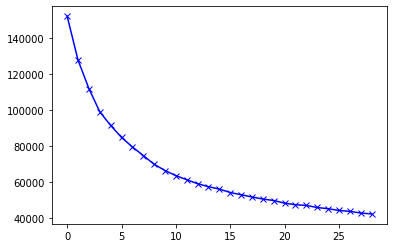

In [23]:
#Lets use the elbow method to determine the number of K
plt.plot(sse, 'bx-')

In [24]:
cluster_df = pd.DataFrame({'num_cluster':range(1,n_clusters), 'cluster_error':sse})
cluster_df

,num_cluster,cluster_error
0,1,152150.000000
1,2,127784.874491
2,3,111986.568310
3,4,99073.938268
4,5,91502.920432
5,6,84850.981658
6,7,79576.985204
7,8,74809.220244
8,9,69954.675245
9,10,66470.077319


From above, the number of cluster to use seems to be 4 because the sums of error from the 4thnumber decreased steadily.

In [26]:
kmean = KMeans(n_clusters = 4, init = 'k-means++', n_init= 10, max_iter= 300)
kmean.fit(X)
labels = kmean.labels_

In [27]:
clusters = pd.concat([df, pd.DataFrame({'clusters':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Interpretation of Clusters 

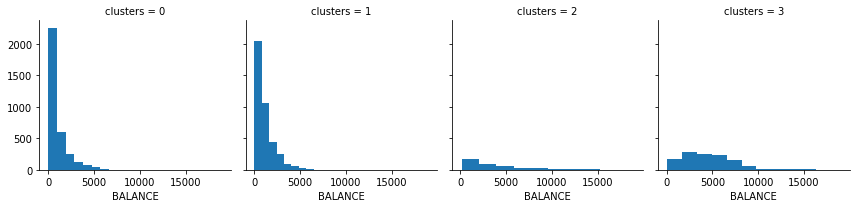

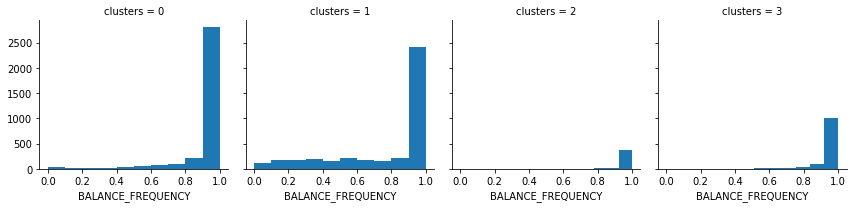

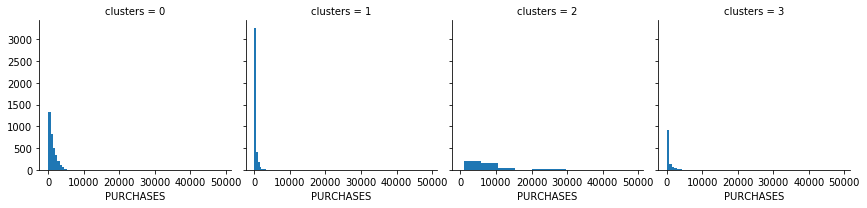

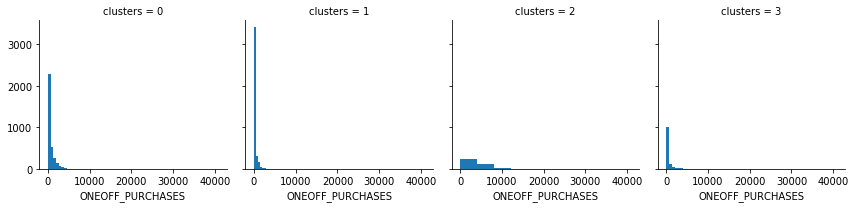

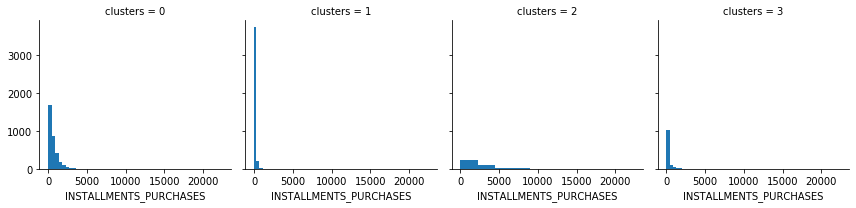

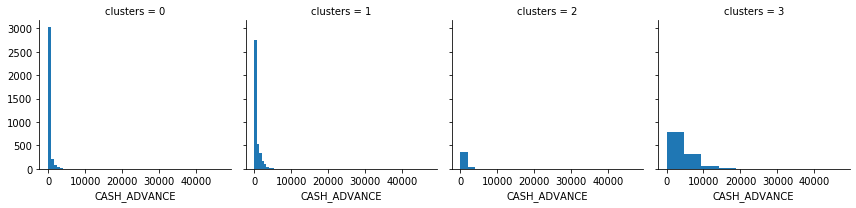

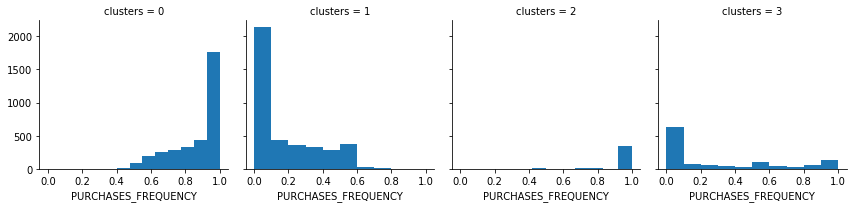

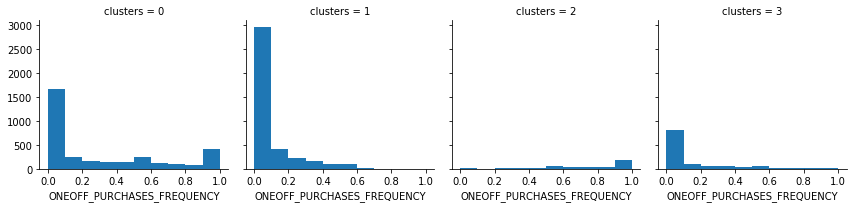

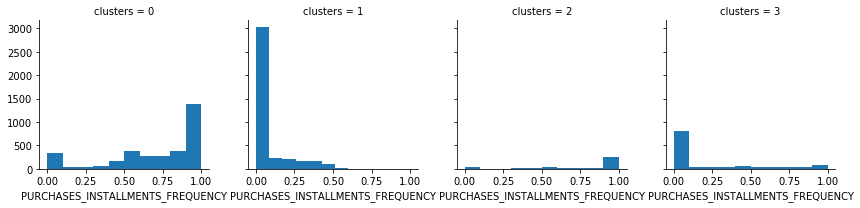

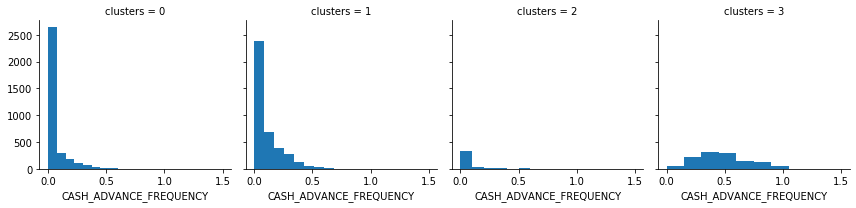

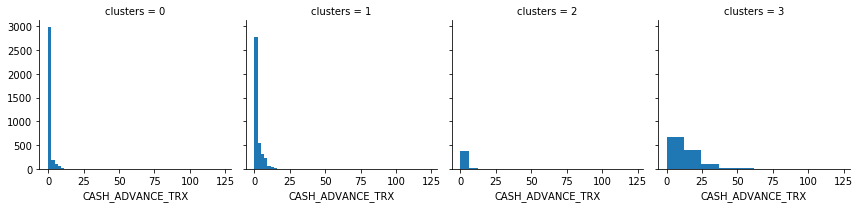

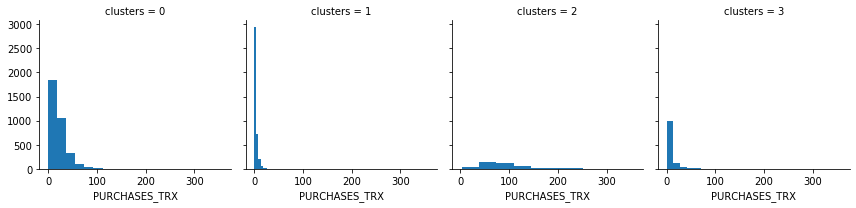

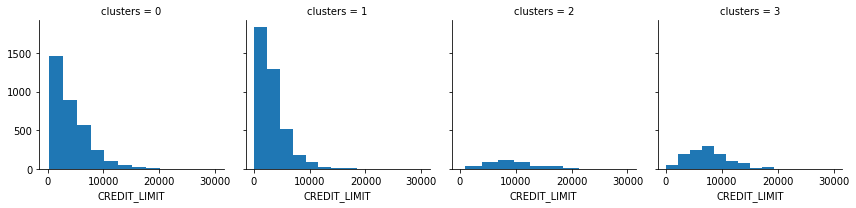

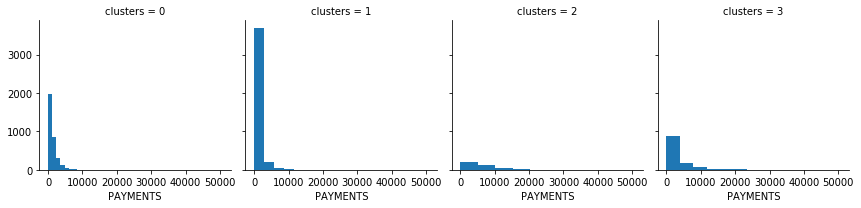

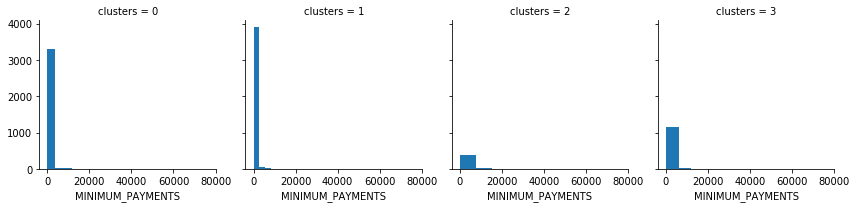

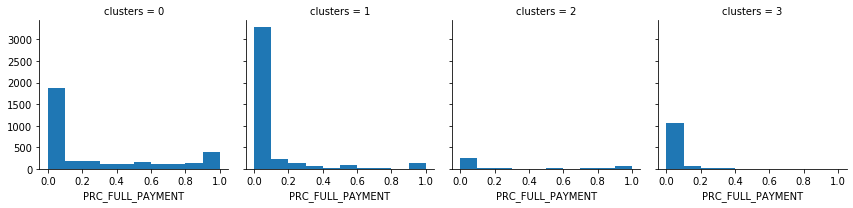

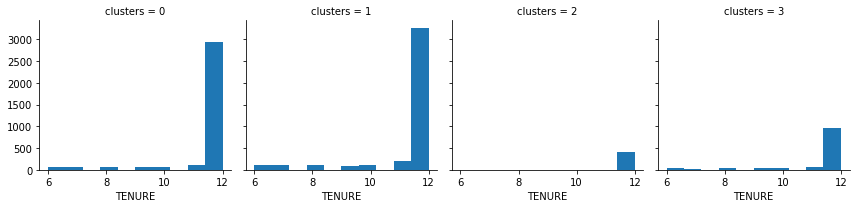

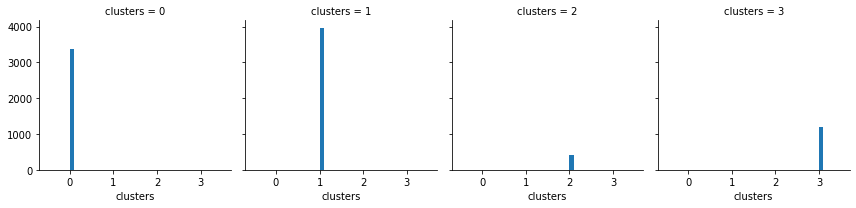

In [29]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='clusters')
    grid.map(plt.hist,c)

In [30]:
clusters.groupby('clusters').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


### So What do these clusters say about our customers behaviour? 

#### Cluster Zero
In this cluster, the customers have very high balance, and their balance is regularly updated. They also have high amount of purchase. These purchases are mostly done in installment. They rarely pay for items with cash in advance. They adlo got a fair credit limit

#### Cluster One 
In this cluster, the customers have a high balance with their balance not regularly updated. Thry also have low purchases. Payment by installment and one off are also very low. Majority of the purchases are done by cash in advance. They have low credit limit. 

#### Cluster Two
The customers in this clusters have a low balance and their balance are frequently updated. These customers have the highest purchase with majority of these purchases being one-off payment  followed by payment in installment. They rarely pay with cash in advance. These customers have the highest credit limit and the highest payment.

#### Cluster Three 
The customers in this cluster have a high balance which is regularly updated. They dont have that much of a purchase and when they do, it i mostly done via advance cash payment.


### Applying PCA 
We apply PCA to transform data to 2 dimensions for visualization. 

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)
principalcomponents = pca.fit_transform(X)
principalDF= pd.DataFrame(data= principalcomponents, columns=['principal component 1', 'principal component 2'])

principalDF.head()

,principal component 1,principal component 2
0,-1.682220,-1.076450
1,-1.138294,2.506489
2,0.969689,-0.383489
3,-0.873632,0.043138
4,-1.599432,-0.688569


In [34]:
finalDF = pd.concat([principalDF, pd.DataFrame({'clusters':labels})], axis =1)

finalDF.head()

,principal component 1,principal component 2,clusters
0,-1.682220,-1.076450,1
1,-1.138294,2.506489,3
2,0.969689,-0.383489,0
3,-0.873632,0.043138,1
4,-1.599432,-0.688569,1


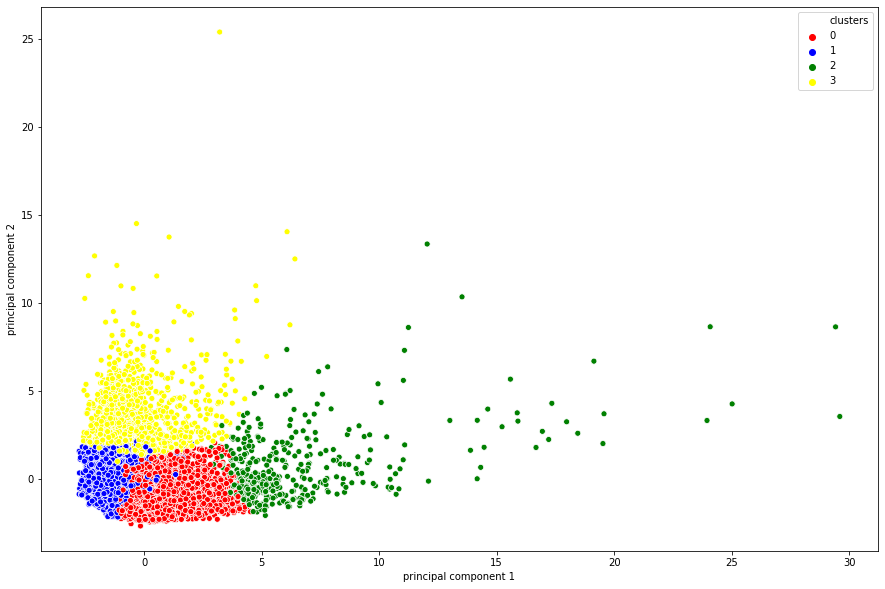

In [35]:
plt.figure(figsize= (15,10))
ax= sns.scatterplot(x='principal component 1', y= 'principal component 2', hue= 'clusters', data= finalDF, palette=['red','blue', 'green','yellow'])
plt.show()